In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [3]:
# Convert target variable to binary numeric format
df['Classes'] = df['Classes'].str.strip()
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [4]:
# Define feature set X and target y
X = df.loc[:, ['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI']]
y = df['Classes']

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# Initialize and train the SVM classification model
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [7]:
# Predict fire occurrences
# df['predicted_fire'] = svm_model.predict(X)

# Predict fire occurrences using the loaded model from pickle
# with open('svm_model.pkl', 'rb') as file:
#    loaded_svm_model = pickle.load(file)
# df['predicted_fire'] = loaded_svm_model.predict(X)

df['predicted_fire'] = svm_model.predict(X)

# Extract month from the date column
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df['month'] = df['date'].dt.month


In [8]:
# Group by month and calculate fire occurrence frequency
monthly_fire_frequency = df.groupby('month')['predicted_fire'].mean()  # Mean gives the frequency of 'fire' (1)

In [9]:
# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month number to month name
monthly_fire_frequency.index = monthly_fire_frequency.index.map(lambda x: month_names[x - 1])

# Scale the prediction to a scale of 10
monthly_fire_frequency_scaled = (monthly_fire_frequency / monthly_fire_frequency.max()) * 10

# Print the monthly fire frequency
print("Monthly fire frequency prediction:")
print(monthly_fire_frequency)

Monthly fire frequency prediction:
month
January      0.25
February     0.00
March        0.00
April        0.00
May          0.00
June         0.00
July         0.00
August       0.00
September    0.00
October      0.25
November     0.25
December     0.25
Name: predicted_fire, dtype: float64


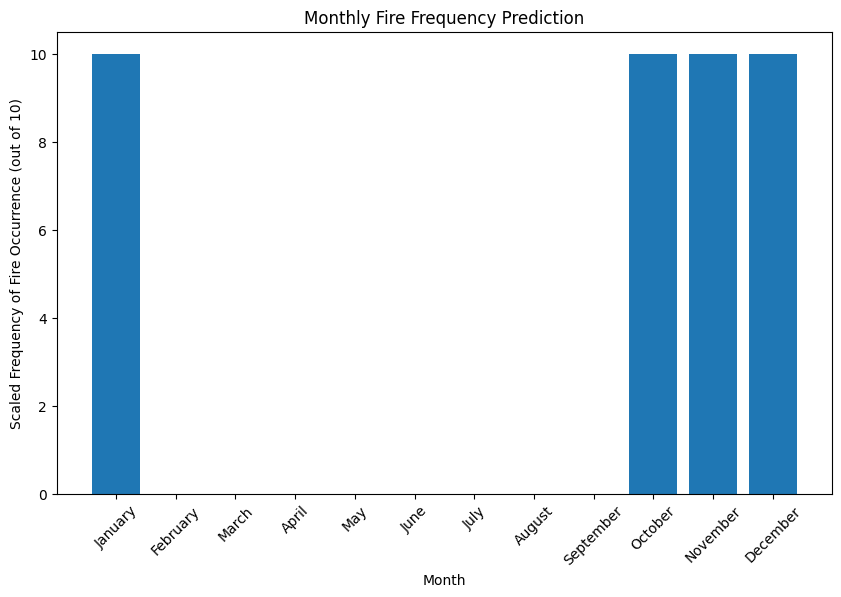

In [10]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_fire_frequency_scaled.index, monthly_fire_frequency_scaled.values)
plt.xlabel('Month')
plt.ylabel('Scaled Frequency of Fire Occurrence (out of 10)')
plt.title('Monthly Fire Frequency Prediction')
plt.xticks(rotation=45)
plt.show()


In [11]:
# threshold setting
threshold = 0.225

# Filter months where predicted fire frequency exceeds the threshold
fire_months = monthly_fire_frequency[monthly_fire_frequency > threshold].index.tolist() # type: ignore

print("Months predicted to have guaranteed fire occurrence:")
print(fire_months)

Months predicted to have guaranteed fire occurrence:
['January', 'October', 'November', 'December']
